<a href="https://colab.research.google.com/github/1024andrew/colab_ML-DL_practice/blob/main/5_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight','Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
print(fish_input[:5])
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SDGClassifier이다.
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter = 10, random_state=42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9663865546218487
0.925


In [ ]:
#partial_fit을 반복할 수록 과적합이 되기 때문에 가장 고성능을 내는 max_iter를 찾아야한다.
#이전에 릿지 회귀에서 alpha를 찾은 것 처럼 그래프를 통해 찾을 수 있다.
import matplotlib.pyplot as plt
import numpy as np

sc = SGDClassifier(loss = "log_loss", random_state=42)

train_score =[]
test_score =[]

classes = np.unique(train_target)

for i in range (0,300):
  #partial_fit을 처음 호출할 때는 전체 클래스의 레이블 목록을 classes에 알려줘야함
  #한번에 전체 데이터를 다 보는게 아니기 때문에 처음 들어온 데이터에 없는 클래스가 존재할 수도 있으므로
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))



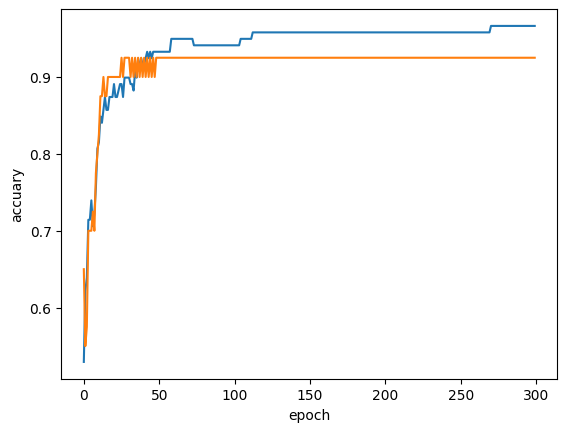

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuary')
plt.show()

In [ ]:
#그래프 확인 결과 max_iter이 100일 때 가장 성능이 높음.
#tol 매개변수를 통해 향상도리 최솟값을 지정(SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤)
sc = SGDClassifier(loss='log_loss', max_iter = 100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
